In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
claimants = pd.read_csv("claimants (1).csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
claimants.shape

(1340, 7)

In [4]:
claimants["ATTORNEY"].value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

In [5]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [6]:
claimants.head(2)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891


In [7]:
#Shape of the data set
claimants.shape

(1340, 6)

In [8]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [9]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [11]:
claimants.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [12]:
claimants.head(2)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891


In [13]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [14]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [15]:
Y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [16]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [17]:
classifier.intercept_

array([-0.17361679])

In [18]:
classifier.coef_

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

In [19]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [20]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_values': classifier.predict(X)})

In [21]:
y_pred_df

,actual,predicted_values
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [22]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [23]:
ac(Y,y_pred)

0.708029197080292

In [24]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [25]:
# ROC Curve

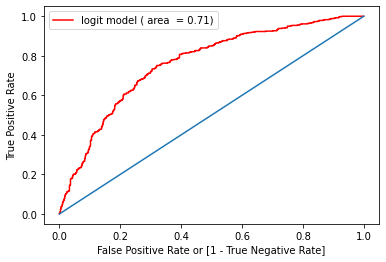

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()


In [27]:
auc

0.7108589063606365

# Mutilple classes

In [28]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac

In [29]:
data=sns.load_dataset("iris")

In [30]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
data.shape

(150, 5)

In [32]:
data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [33]:
x=data.iloc[:,:4]
y=data.iloc[:,4]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [35]:
x_train.shape

(105, 4)

In [36]:
y_train.shape

(105,)

In [37]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_train_pred=classifier.predict(x_train)

In [39]:
ac(y_train,y_train_pred)

0.9904761904761905

In [40]:
y_test_pred=classifier.predict(x_test)

In [41]:
y_test_pred

array(['setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [42]:
ac(y_test_pred,y_test)

0.9555555555555556

In [43]:
classifier.intercept_

array([  8.63733854,   1.58332128, -10.22065982])

In [44]:
classifier.coef_

array([[-0.35553042,  0.92353947, -2.31701079, -1.01239377],
       [ 0.60563741, -0.36315458, -0.24271705, -0.72110807],
       [-0.250107  , -0.56038488,  2.55972784,  1.73350184]])

In [45]:
set(y_train)

{'setosa', 'versicolor', 'virginica'}

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_pred,y_test)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 17]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

